In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=.09, optimizer='adagrad', loss='mae', scale=1e9, early_stop=False, target_stop=2)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 57.375782
epoch  1 --- Loss --- 36.328568
epoch  2 --- Loss --- 33.225754
epoch  3 --- Loss --- 31.802572
epoch  4 --- Loss --- 30.808708
epoch  5 --- Loss --- 29.263401
epoch  6 --- Loss --- 28.92583
epoch  7 --- Loss --- 27.663841
epoch  8 --- Loss --- 27.940308
epoch  9 --- Loss --- 26.924229
epoch  10 --- Loss --- 27.388416
epoch  11 --- Loss --- 26.120127
epoch  12 --- Loss --- 26.118864
epoch  13 --- Loss --- 25.735165
epoch  14 --- Loss --- 24.633572
epoch  15 --- Loss --- 23.805029
epoch  16 --- Loss --- 22.834564
epoch  17 --- Loss --- 22.435917
epoch  18 --- Loss --- 22.10233
epoch  19 --- Loss --- 21.303572
epoch  20 --- Loss --- 20.91295
epoch  21 --- Loss --- 20.670753
epoch  22 --- Loss --- 19.84
epoch  23 --- Loss --- 19.788105
epoch  24 --- Loss --- 18.812853
epoch  25 --- Loss --- 18.867277
epoch  26 --- Loss --- 18.683601
epoch  27 --- Loss --- 18.05101
epoch  28 --- Loss --- 17.748411
epoch  29 --- Loss --- 17.374798
epoch  30 --- Loss --- 17.45

In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 10.081188182036081 minutes


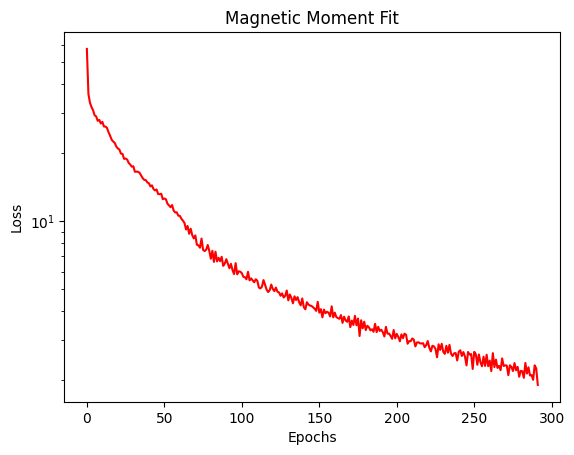

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[-0.01858302 -0.02932155  0.15650027]]
Value:     [[0.16898514 0.1691615  2.6405902 ]]
---- Moment  1 -----
Position:  [[ 0.5088013  -0.01949572 -0.01099595]]
Value:     [[0.94980776 0.09982236 0.05296468]]
---- Moment  2 -----
Position:  [[ 0.00715758  0.27936524 -0.02041281]]
Value:     [[-0.12917697  1.6819569   0.28025207]]
